In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm

In [1]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

/Users/kyleryan/opt/anaconda3/envs/BERTMultiDimensional/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir('../data')

In [5]:
df = pd.read_csv('IMDB_Dataset.csv')
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
religion_vector = ['Christianity', 'Islam', 'Judaism']

In [7]:
df_neg500 = df[df['sentiment'] == 'negative'].head(500)
df_pos500 = df[df['sentiment'] == 'positive'].head(500)

samples = [df_neg500, df_pos500]
df_sentiment500 = pd.concat(samples)
sentences = df_sentiment500.to_numpy()

In [8]:
sentence_embeddings = model.encode(sentences)
nv_embeddings = model.encode(religion_vector)

In [9]:
cs_arr = cosine_similarity(
    [nv_embeddings[0]],
    sentence_embeddings[1:]
)

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

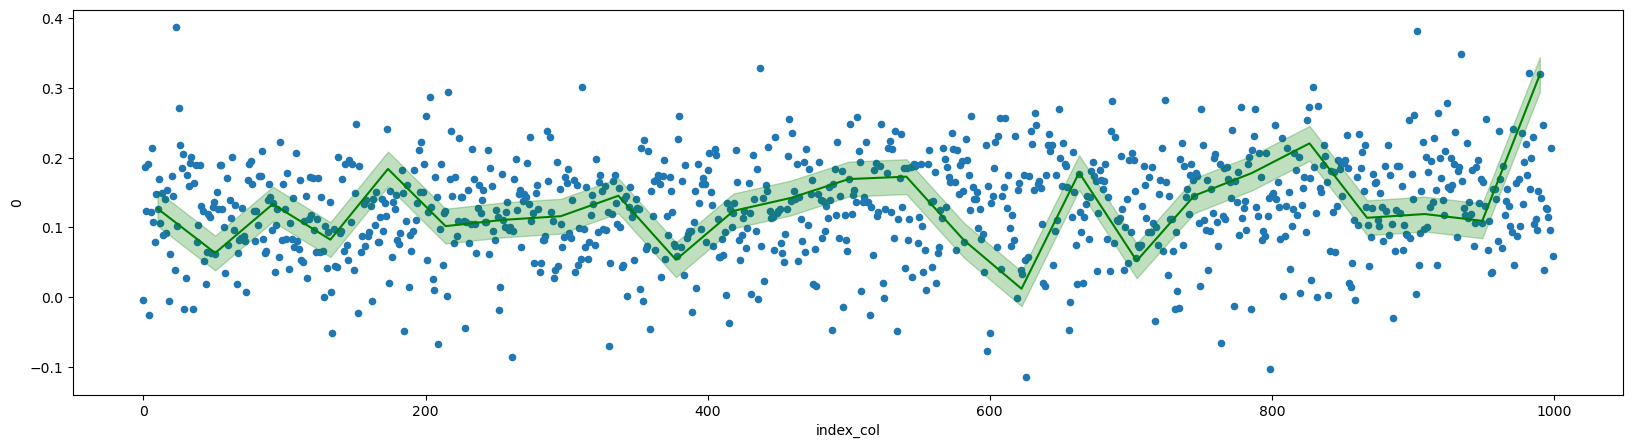

In [11]:
test_cos = cosine_similarity(
    [nv_embeddings[0]],
    sentence_embeddings[:]
)

american_cs_df = pd.DataFrame(test_cos)
american_cs_df = american_cs_df.transpose()

american_cs_df['index_col'] = american_cs_df.index

american_cs_df.plot.scatter(x="index_col", y=0)

x = american_cs_df["index_col"]
y = american_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=25)
y2 = fun(x2)

plt.plot(x2, y2, color='g')
plt.plot(x, y, ls='', marker='o', color='g', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='g')
plt.show()

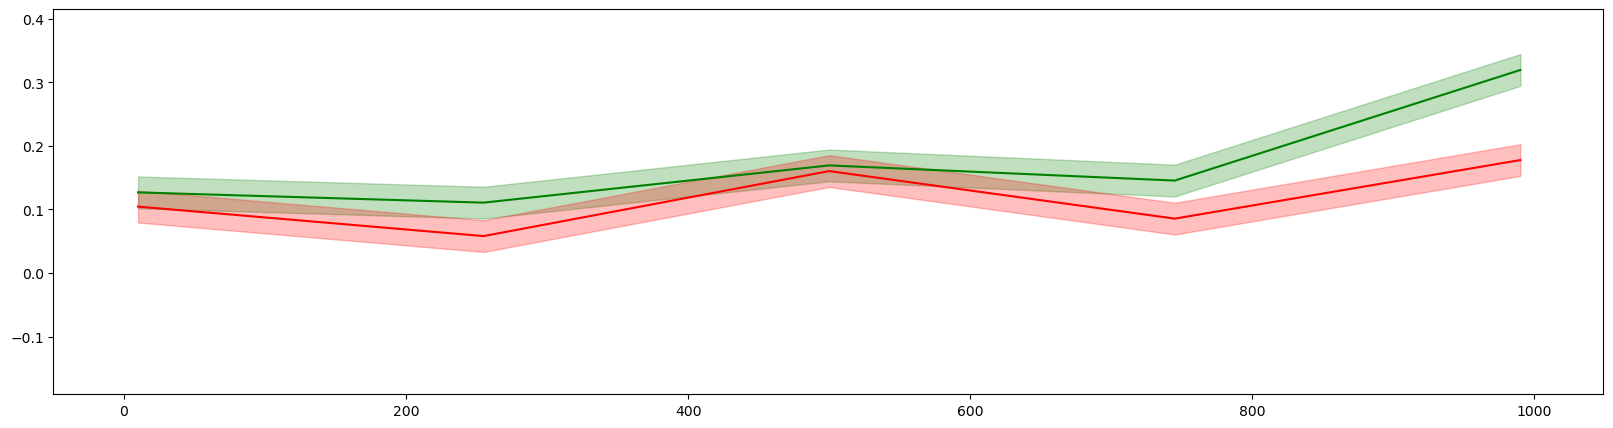

In [12]:
test_cos = cosine_similarity(
    [nv_embeddings[0]],
    sentence_embeddings[:]
)

american_cs_df = pd.DataFrame(test_cos)
american_cs_df = american_cs_df.transpose()

american_cs_df['index_col'] = american_cs_df.index

#american_cs_df.plot.scatter(x="index_col", y=0)

x = american_cs_df["index_col"]
y = american_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='g')
plt.plot(x, y, ls='', marker='o', color='g', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='g')

# --------------------------------------------------------------------- #
test_cos = cosine_similarity(
    [nv_embeddings[1]],
    sentence_embeddings[:]
)

canadian_cs_df = pd.DataFrame(test_cos)
canadian_cs_df = canadian_cs_df.transpose()

canadian_cs_df['index_col'] = canadian_cs_df.index

x = canadian_cs_df["index_col"]
y = canadian_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='r')
plt.plot(x, y, ls='', marker='o', color='r', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='r')
plt.show()

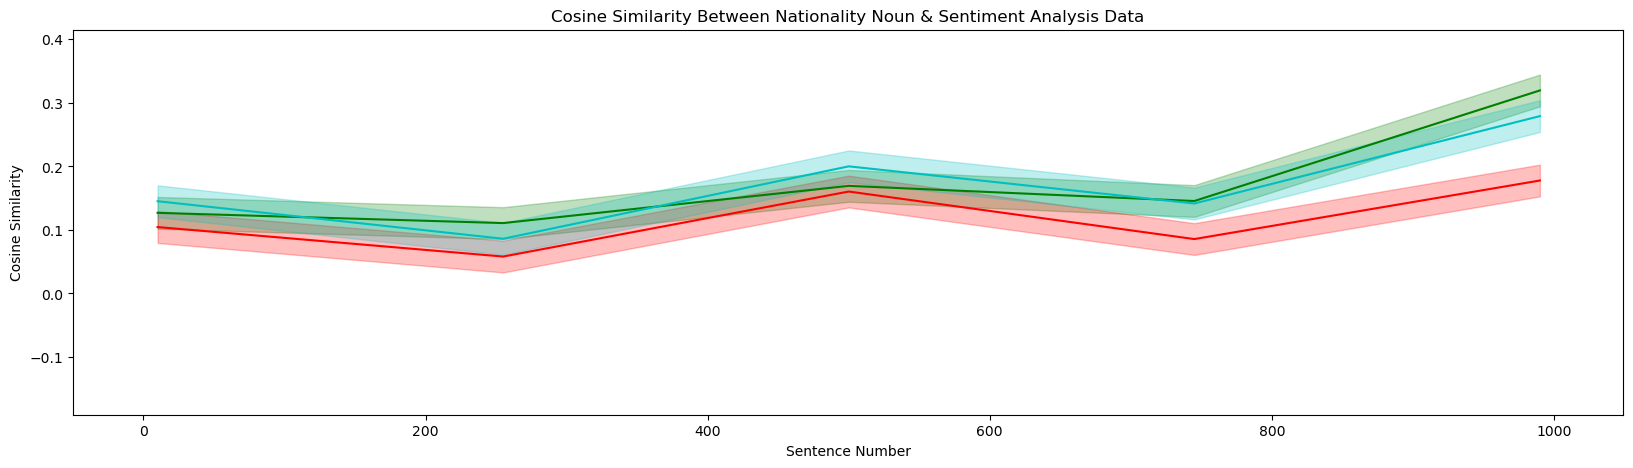

In [14]:
test_cos = cosine_similarity(
    [nv_embeddings[0]],
    sentence_embeddings[:]
)

american_cs_df = pd.DataFrame(test_cos)
american_cs_df = american_cs_df.transpose()

american_cs_df['index_col'] = american_cs_df.index

#american_cs_df.plot.scatter(x="index_col", y=0)

x = american_cs_df["index_col"]
y = american_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='g')
plt.plot(x, y, ls='', marker='o', color='g', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='g')

# --------------------------------------------------------------------- #
test_cos = cosine_similarity(
    [nv_embeddings[1]],
    sentence_embeddings[:]
)

english_cs_df = pd.DataFrame(test_cos)
english_cs_df = english_cs_df.transpose()

english_cs_df['index_col'] = english_cs_df.index

x = english_cs_df["index_col"]
y = english_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='r')
plt.plot(x, y, ls='', marker='o', color='r', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='r')

# --------------------------------------------------------------------- #
test_cos = cosine_similarity(
    [nv_embeddings[2]],
    sentence_embeddings[:]
)

chinese_cs_df = pd.DataFrame(test_cos)
chinese_cs_df = chinese_cs_df.transpose()

chinese_cs_df['index_col'] = chinese_cs_df.index

x = chinese_cs_df["index_col"]
y = chinese_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=10, stop=990, num=5)
y2 = fun(x2)

plt.plot(x2, y2, color='c')
plt.plot(x, y, ls='', marker='o', color='c', alpha=0)

# Fill Between
error = .025
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='c')

plt.title('Cosine Similarity Between Nationality Noun & Sentiment Analysis Data')
plt.xlabel("Sentence Number")
plt.ylabel("Cosine Similarity")
plt.show()